In [179]:
from google.colab import files
uploaded = files.upload()

Saving Data_.xlsx to Data_ (2).xlsx


In [180]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [181]:
import io
job_data = pd.read_excel(io.BytesIO(uploaded['Data_.xlsx']))

In [182]:
job_data.shape

(2544, 16)

In [183]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   status                       2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [184]:
job_data.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [185]:
job_data.head(20)

,id,status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


In [186]:
features_with_na = [features for features in job_data.columns if job_data[features].isnull().sum() >1 ]
for feature in features_with_na:
  print(feature, np.round(job_data[feature].isnull().mean()*100,4),'% missing values')

cohort_tag 0.3145 % missing values
program_duration_days 24.2138 % missing values
employment_status  9.0016 % missing values
highest_level_of_education 2.2799 % missing values
length_of_job_search 2.9088 % missing values
biggest_challenge_in_search 0.9434 % missing values
professional_experience 8.7264 % missing values
work_authorization_status 11.1635 % missing values
number_of_interviews 8.5692 % missing values
gender 19.3396 % missing values
race 0.7075 % missing values


In [187]:
active = job_data[job_data['status'] == 'Active']

In [188]:
active

,id,status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
14,15,Active,PSO,DEC19A,NaN,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,Male,Non-Hispanic White or Euro-American
15,16,Active,PSO,JAN20A,NaN,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,Male,South Asian or Indian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,2533,Active,SWE,OCT18B,NaN,0,NaN,Bachelor's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,2,NaN,"Black, Afro-Caribbean, or African American"
2536,2537,Active,Design,FEB20B,NaN,0,Employed Full-Time,Bachelor's Degree,Over a year,Hearing back on my applications,5+ years,NaN,0.0,10,NaN,South Asian or Indian American
2537,2538,Active,SWE,JAN19B,NaN,0,Contractor,Bachelor's Degree,1-2 months,Getting past final round interviews,1-2 years,NaN,1.0,70,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American


In [189]:
active[active['program_duration_days'].isnull()]

,id,status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
14,15,Active,PSO,DEC19A,NaN,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,Male,Non-Hispanic White or Euro-American
15,16,Active,PSO,JAN20A,NaN,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,Male,South Asian or Indian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,2533,Active,SWE,OCT18B,NaN,0,NaN,Bachelor's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,2,NaN,"Black, Afro-Caribbean, or African American"
2536,2537,Active,Design,FEB20B,NaN,0,Employed Full-Time,Bachelor's Degree,Over a year,Hearing back on my applications,5+ years,NaN,0.0,10,NaN,South Asian or Indian American
2537,2538,Active,SWE,JAN19B,NaN,0,Contractor,Bachelor's Degree,1-2 months,Getting past final round interviews,1-2 years,NaN,1.0,70,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American


In [190]:
job_data['gender'].value_counts()

Male                        1492
Female                       538
Decline to Self Identify      16
Non-Binary                     6
Name: gender, dtype: int64

In [191]:
job_data.columns

Index(['id', 'status', 'primary_track', 'cohort_tag', 'program_duration_days',
       'placed', 'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race'],
      dtype='object')

In [192]:
categorical_variables = [feature for feature in job_data.columns if job_data[feature].dtype == 'O']

for feature in categorical_variables:
  job_data_dupe = job_data.copy()
  #job_data_dupe.groupby(feature)['placed'].plot.bar(color = ['blue','green','red'])
  #plt.xlabel(feature)
 # plt.show()

  print('\n\n', job_data[feature].value_counts())
  



 Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: status, dtype: int64


 SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: primary_track, dtype: int64


 JAN19A    132
JAN20A    124
DEC18A    116
FEB20A    108
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
JUL19A     66
SEP19B     66
DEC19A     64
JUN19B     64
FEB19A     64
NOV18A     62
NOV19A     62
SEP19A     60
AUG19A     60
SEP18C     54
OCT19B     54
JUN19A     54
SEP18B     50
AUG18A     50
SEP18A     48
JUN18A     48
APR19A     48
JUL19B     44
MAR19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
MAR18A     30
APR18B     30
FEB18A     30
FEB20B     28
APR18A     24
MAY19B     20
MAY19A     18


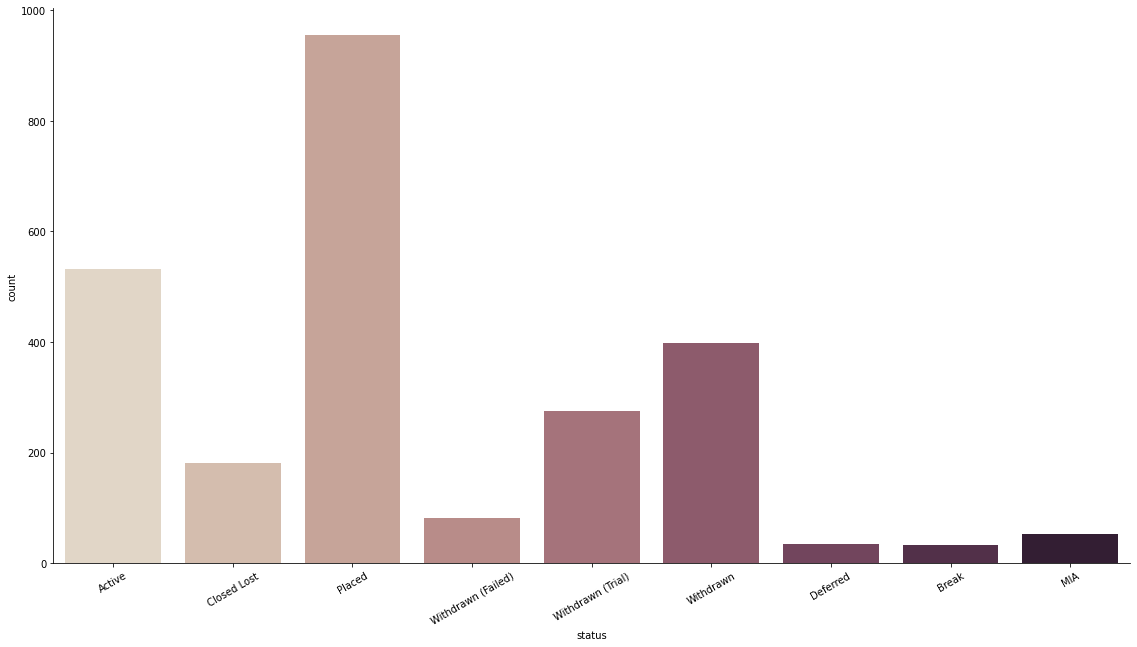

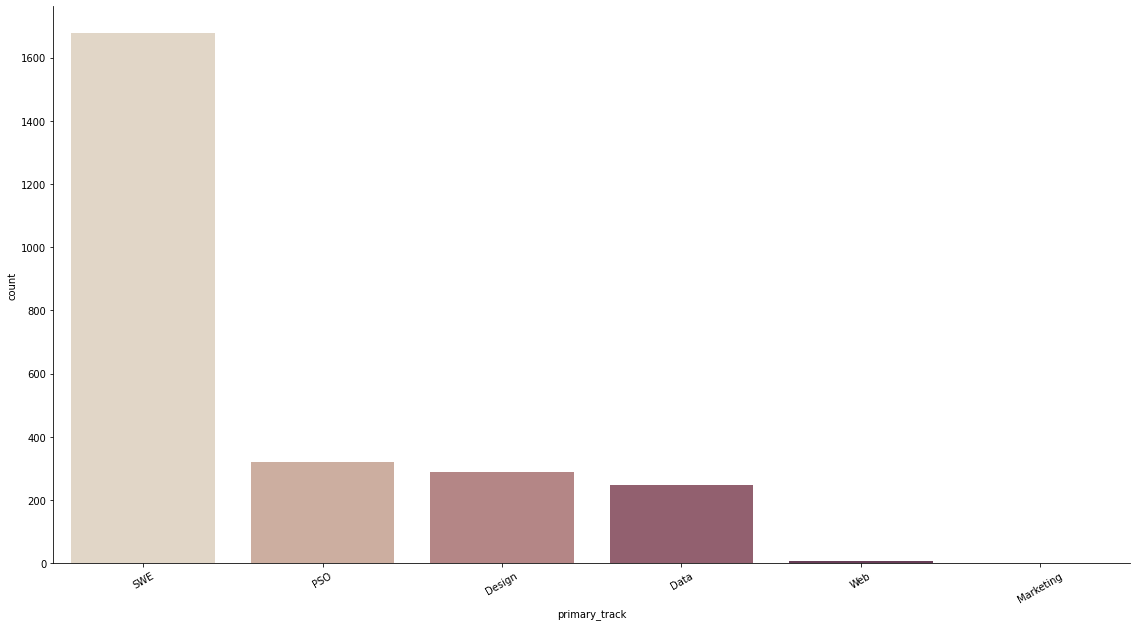

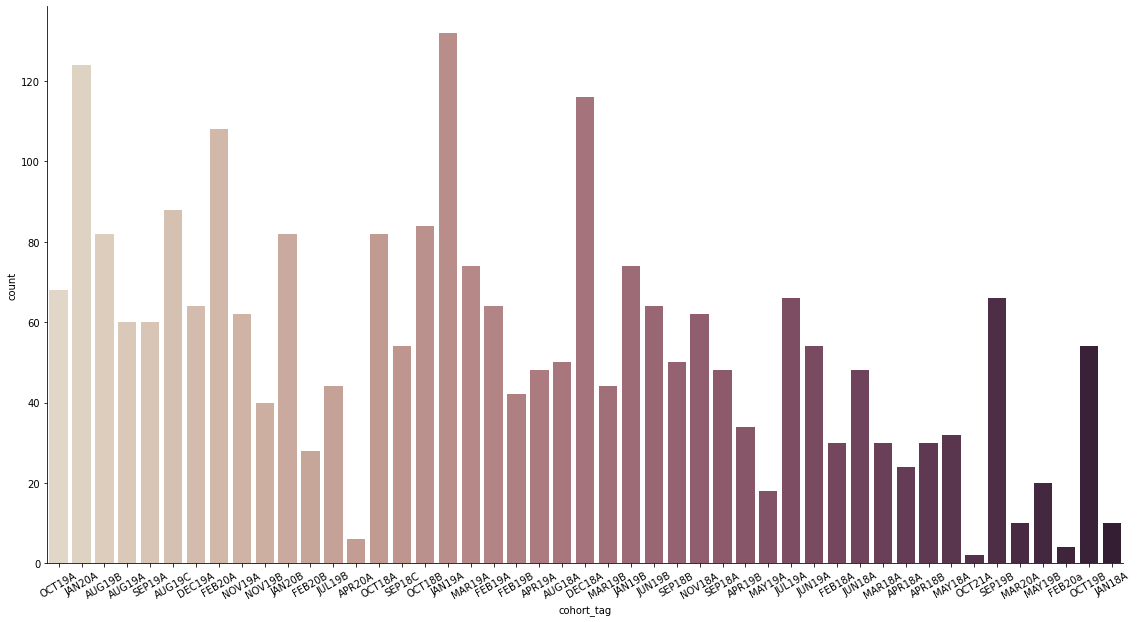

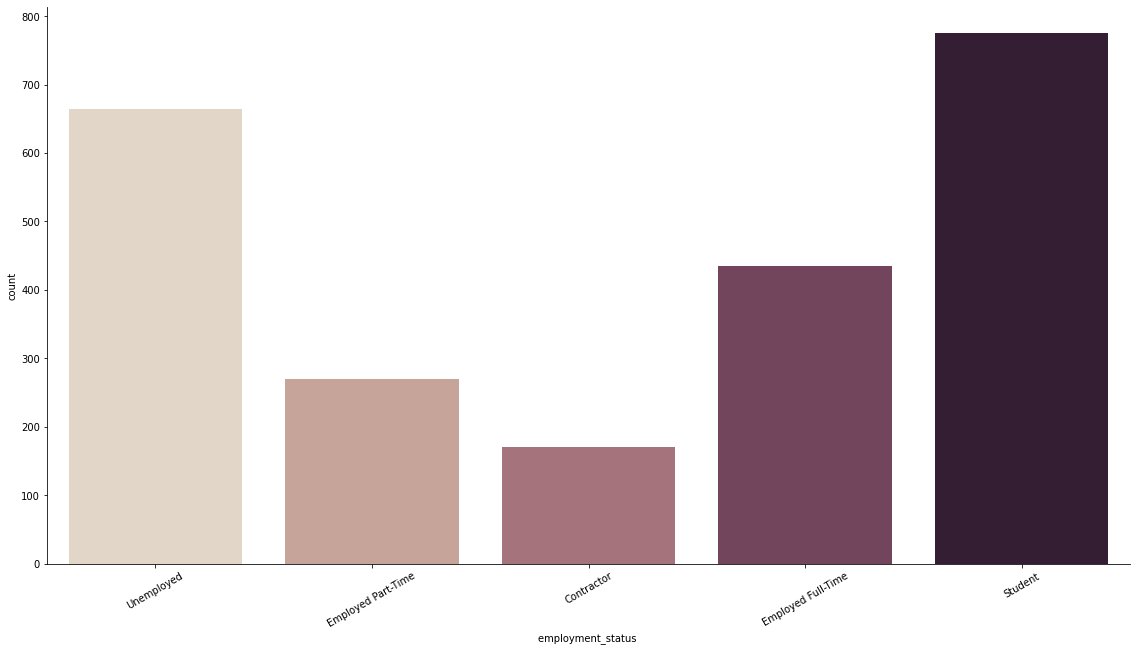

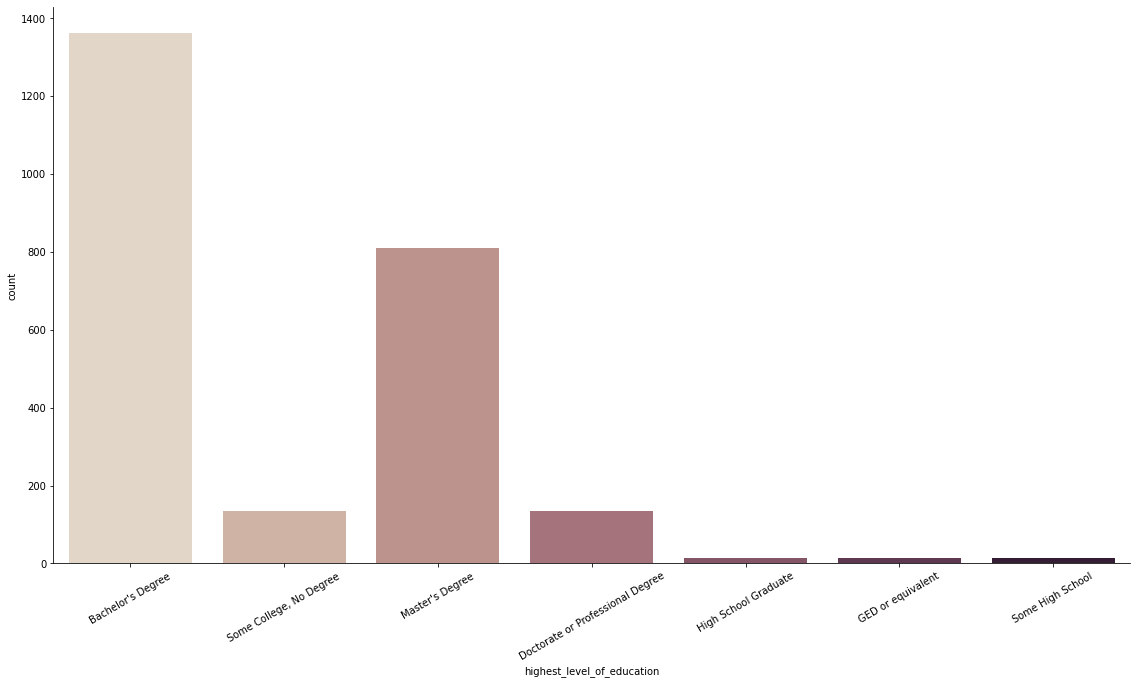

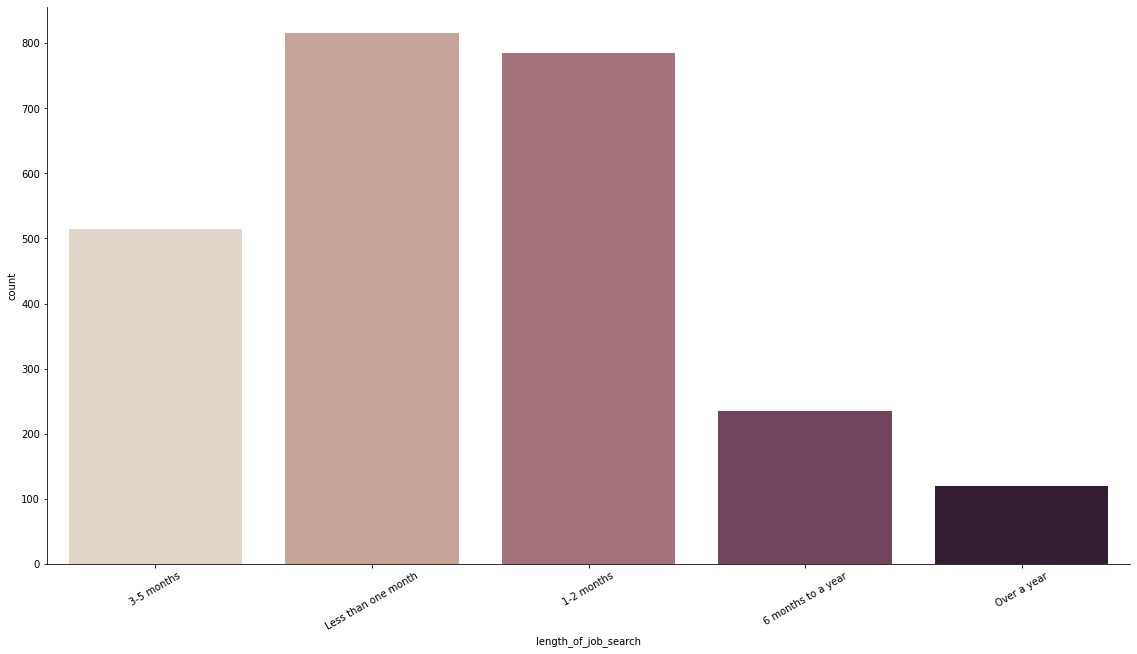

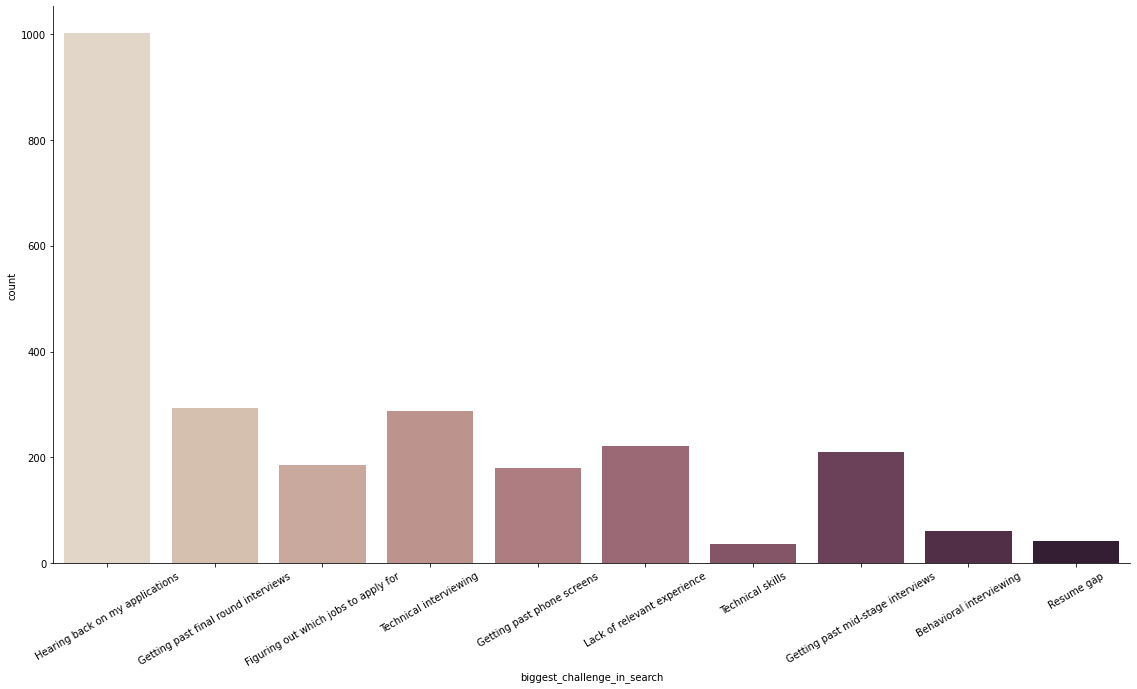

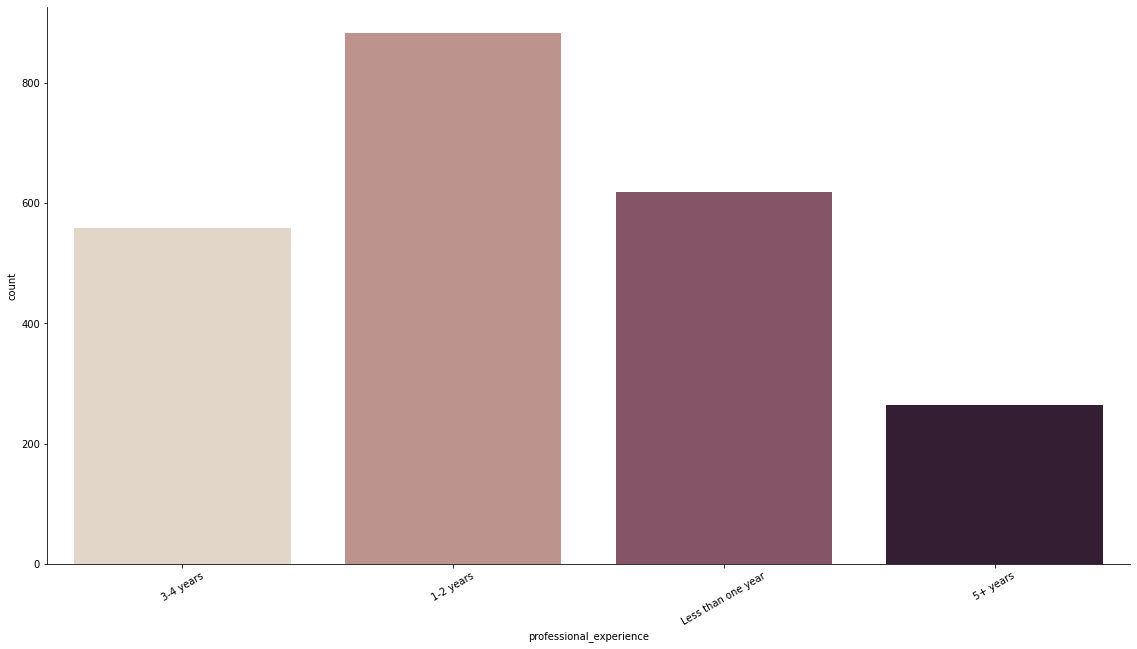

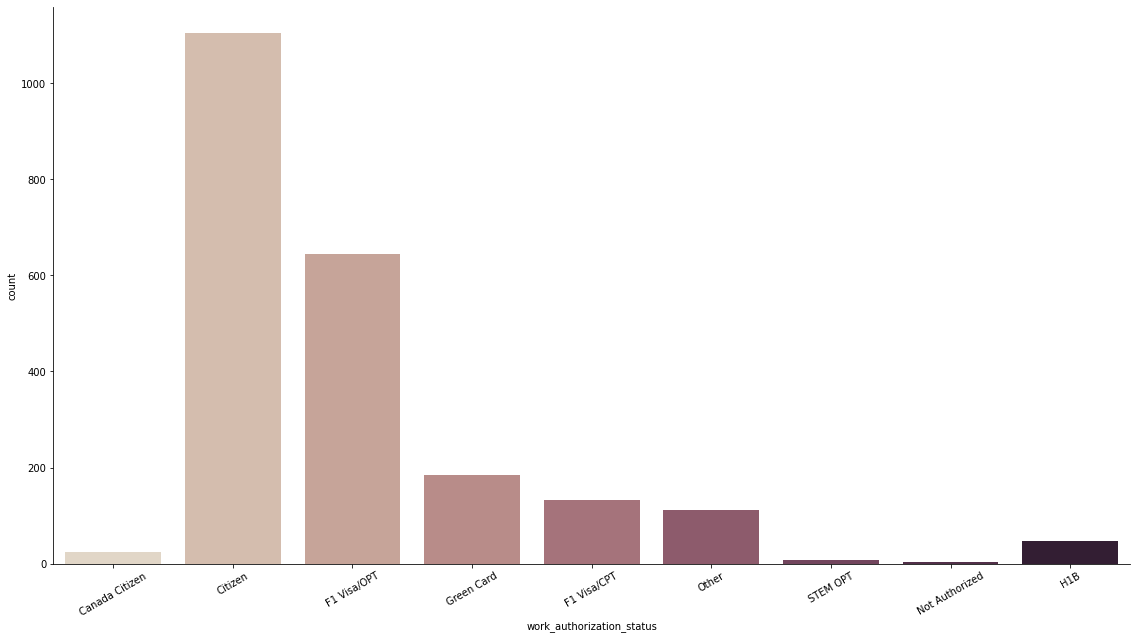

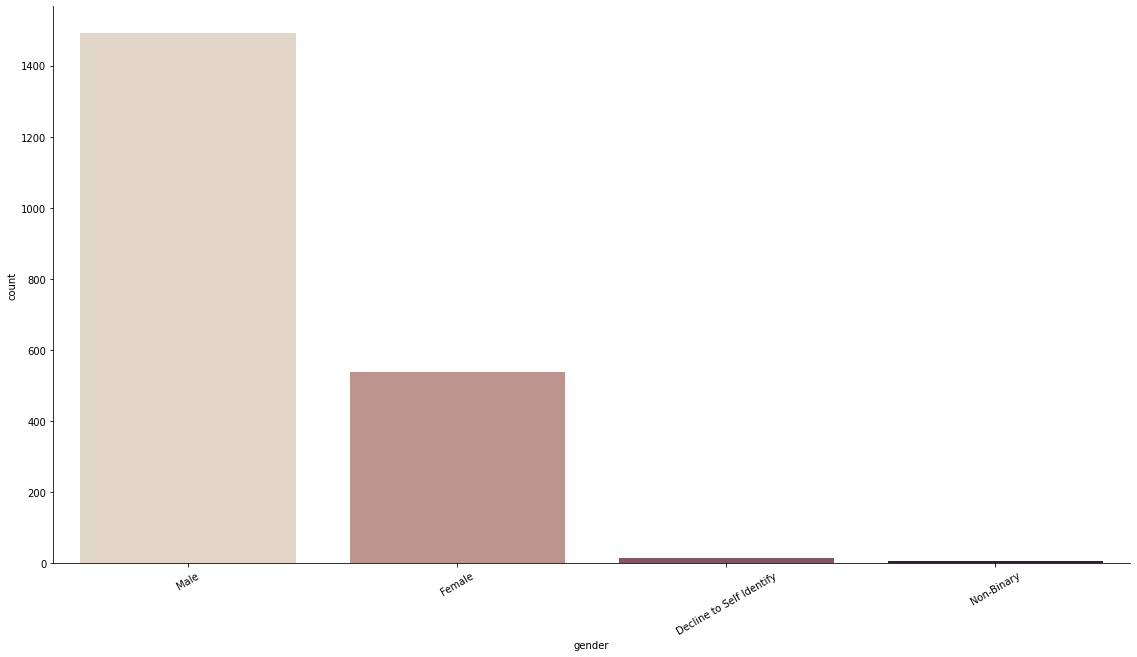

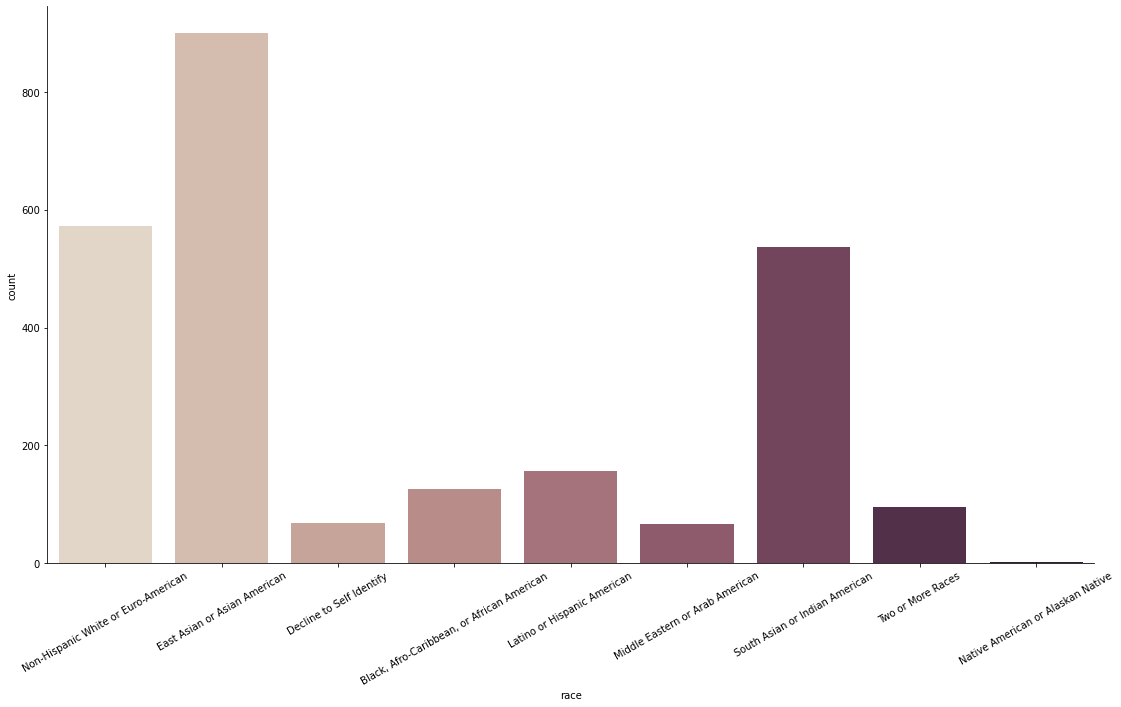

In [193]:

for feature in categorical_variables:
  #sns.set_style('darkgrid')
  #sns.set(rc={'figure.figsize':(11.7,8.27)})
  g = sns.catplot(x=feature, kind="count", palette="ch:.25", data=job_data  ,height=8.27, aspect=15.7/8.27)
  g.set_xticklabels(rotation=30)
  

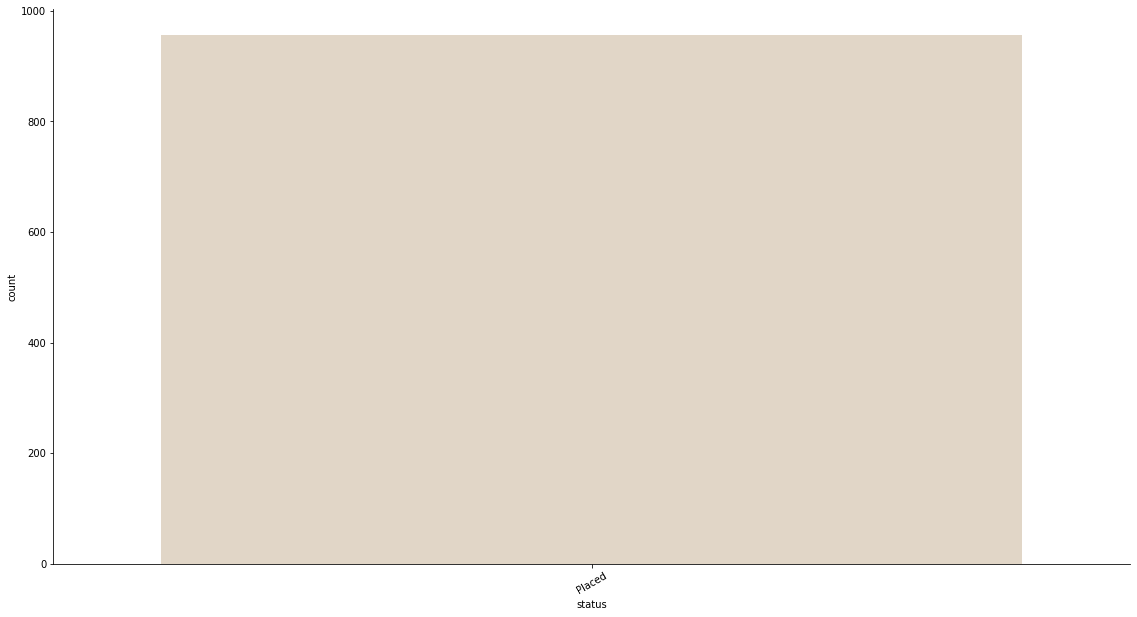

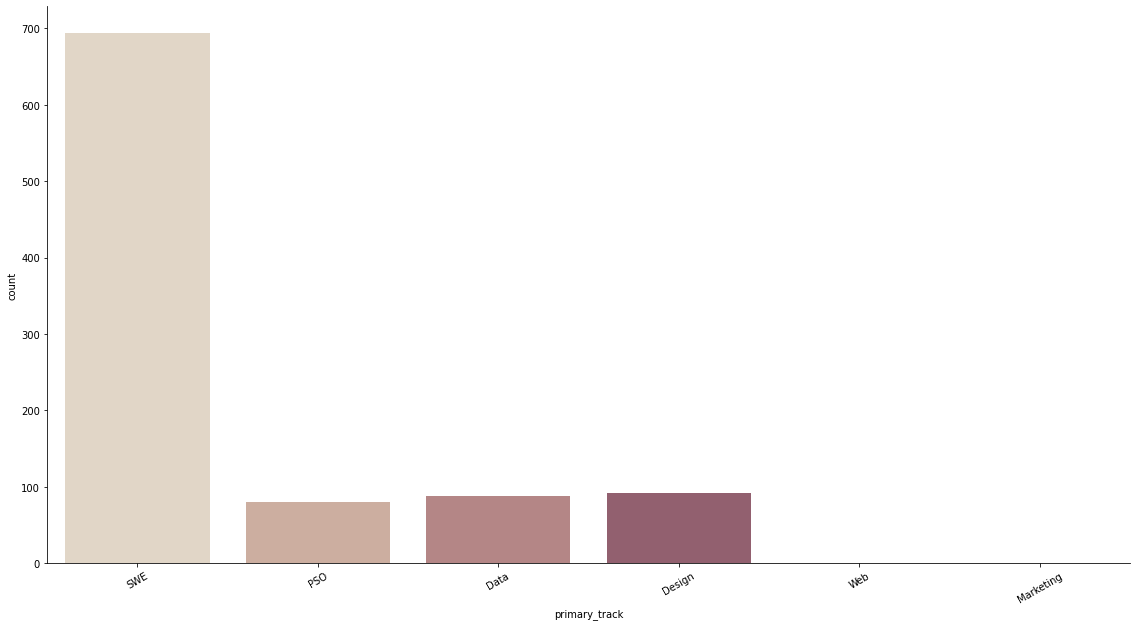

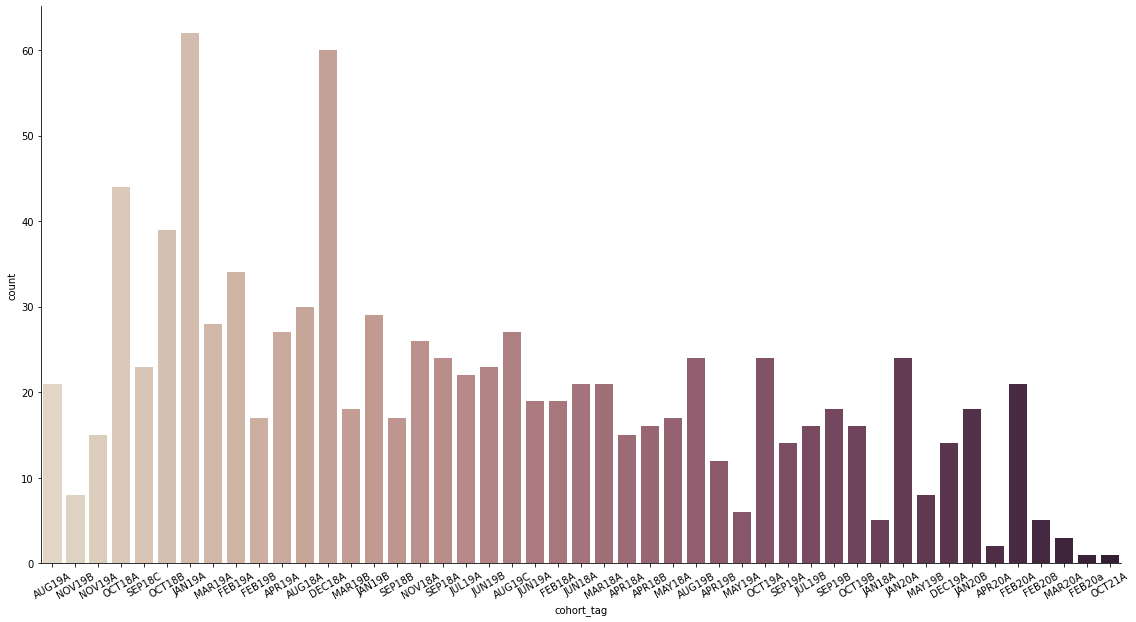

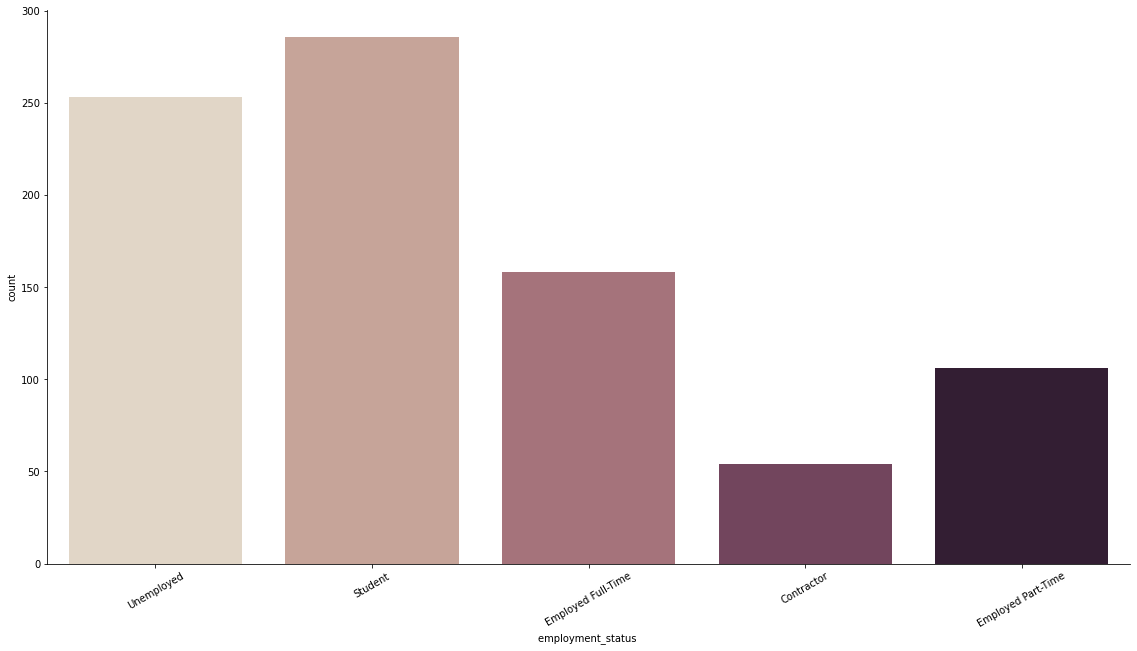

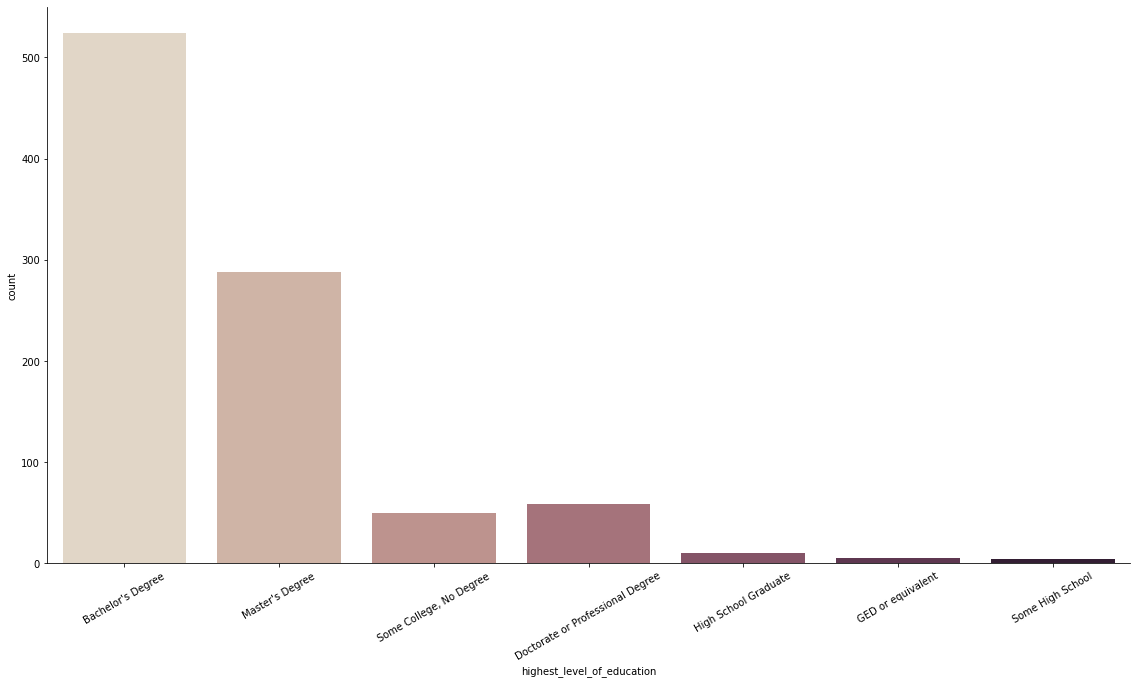

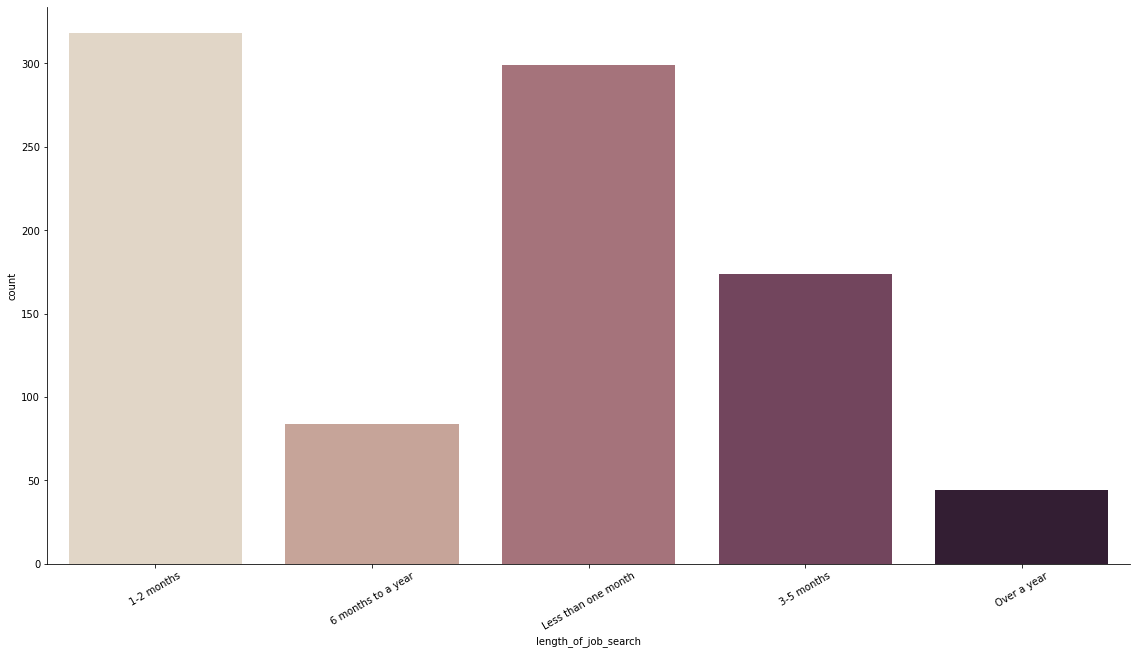

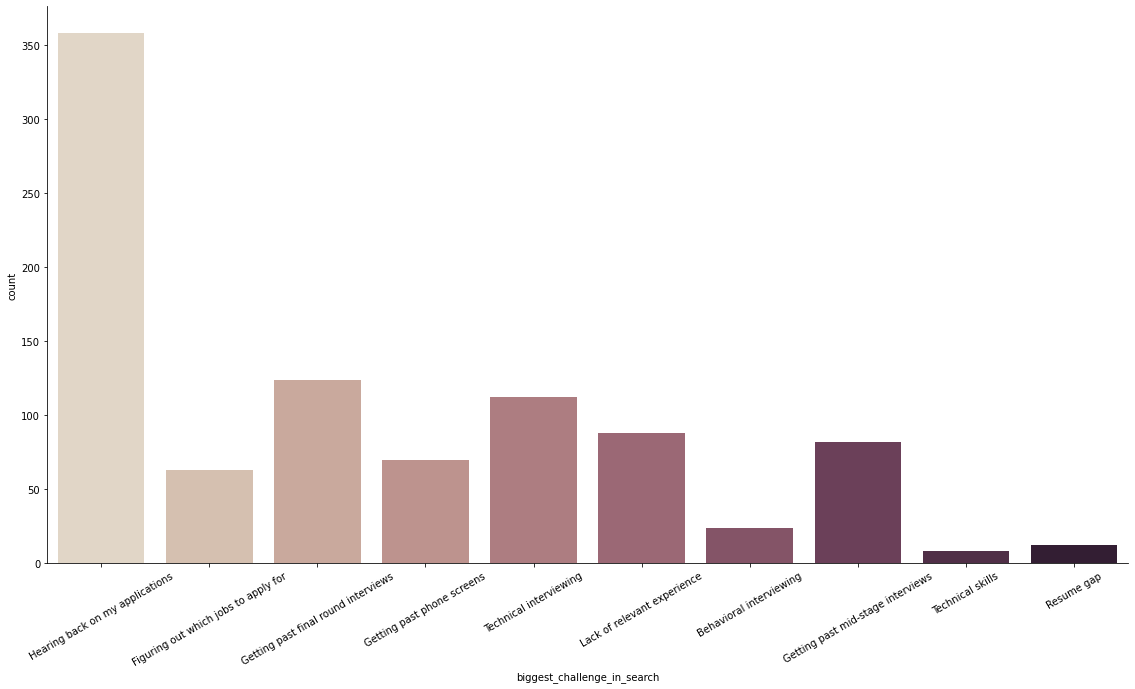

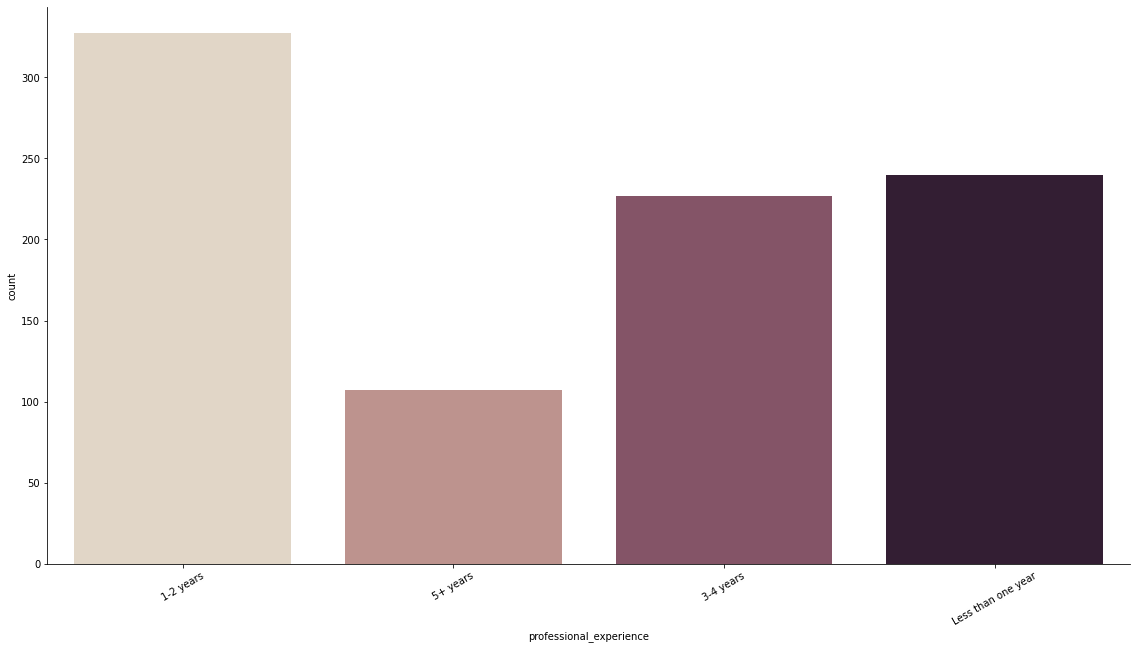

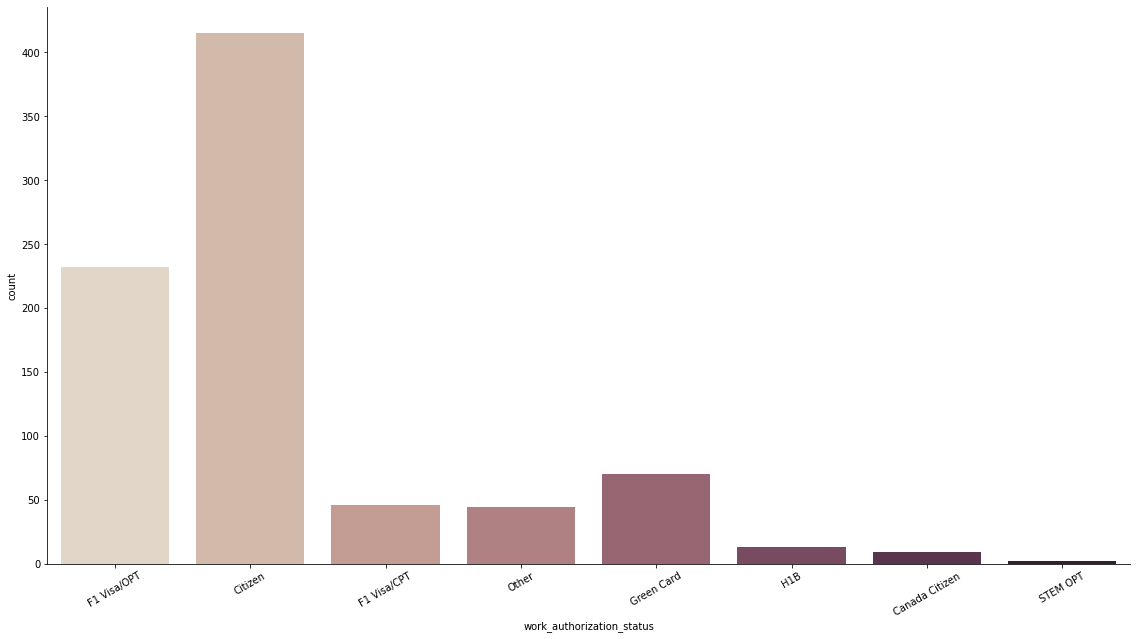

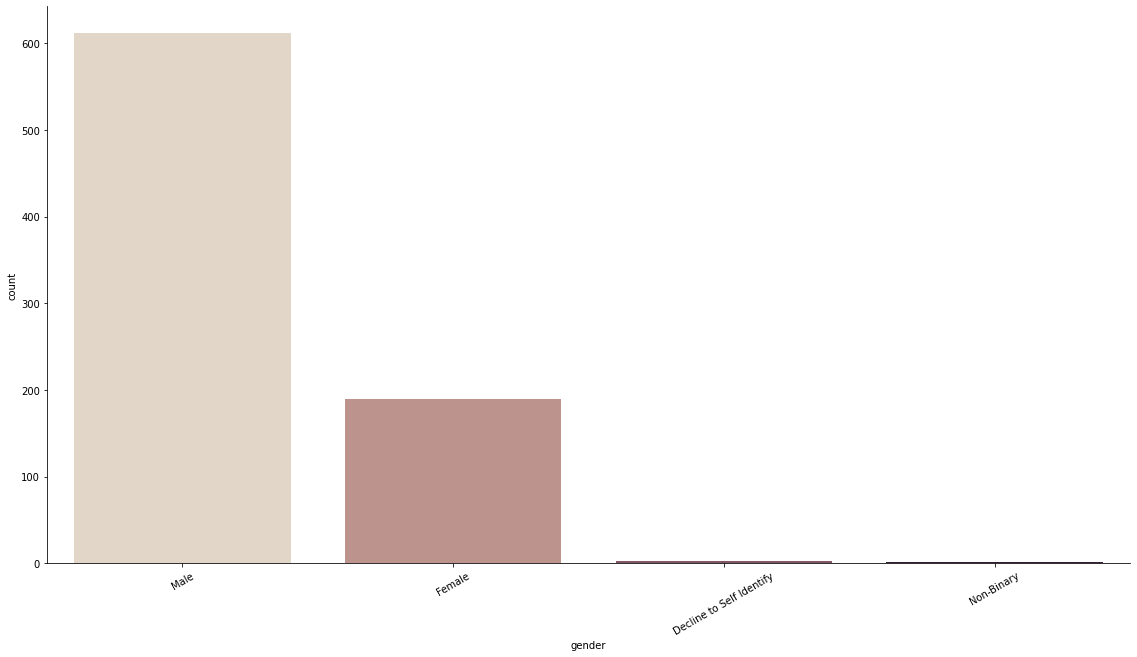

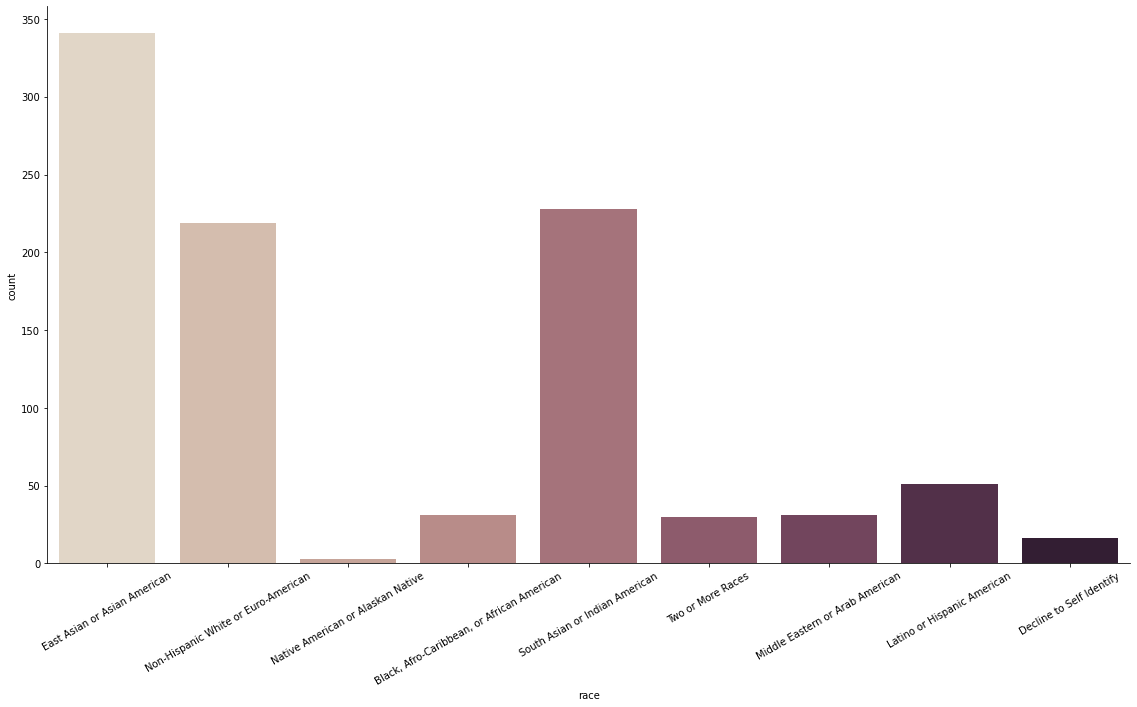

In [194]:
placed = job_data[job_data['placed'] == 1]
for feature in categorical_variables:
  g = sns.catplot(x=feature, kind="count", palette="ch:.25", data=placed  ,height=8.27, aspect=15.7/8.27)
  g.set_xticklabels(rotation=30)


In [195]:
job_data[(job_data['gender'].isin(['Decline to Self Identify', 'Non-Binary']))]


,id,status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
394,395,Withdrawn (Trial),SWE,OCT19A,18.0,0,Student,Master's Degree,Over a year,Hearing back on my applications,3-4 years,Citizen,1.0,20,Decline to Self Identify,Decline to Self Identify
415,416,Active,PSO,SEP19A,NaN,0,Employed Part-Time,Bachelor's Degree,1-2 months,Technical interviewing,3-4 years,Citizen,1.0,15,Non-Binary,Latino or Hispanic American
445,446,Active,SWE,FEB20A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Technical interviewing,Less than one year,Citizen,2.0,20,Non-Binary,Latino or Hispanic American
507,508,Closed Lost,Design,DEC19A,0.0,0,Unemployed,Bachelor's Degree,6 months to a year,Getting past mid-stage interviews,Less than one year,Citizen,0.0,60,Decline to Self Identify,Decline to Self Identify
583,584,Active,SWE,FEB20B,NaN,0,Unemployed,Bachelor's Degree,Less than one month,Getting past mid-stage interviews,1-2 years,Citizen,3.0,4,Decline to Self Identify,Decline to Self Identify
607,608,Withdrawn (Trial),Data,SEP19B,14.0,0,Unemployed,Bachelor's Degree,3-5 months,Getting past phone screens,1-2 years,Citizen,6.0,500,Decline to Self Identify,Decline to Self Identify
806,807,Active,SWE,JAN20A,NaN,0,Unemployed,Bachelor's Degree,6 months to a year,Hearing back on my applications,NaN,Citizen,0.0,35,Decline to Self Identify,Decline to Self Identify
1102,1103,Closed Lost,SWE,APR19A,0.0,0,Unemployed,Bachelor's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,0.0,35,Decline to Self Identify,Decline to Self Identify
1104,1105,Active,SWE,DEC19A,NaN,0,Unemployed,Master's Degree,Over a year,Technical interviewing,NaN,Citizen,1.0,10,Decline to Self Identify,Decline to Self Identify
1142,1143,Active,Design,NOV19B,NaN,0,Employed Part-Time,Bachelor's Degree,1-2 months,Hearing back on my applications,NaN,Citizen,5.0,20,Non-Binary,East Asian or Asian American


In [196]:
job_data['month'] = job_data['cohort_tag'].astype(str).str[0:3]
job_data['year'] = job_data['cohort_tag'].astype(str).str[3:5]
job_data['type'] = job_data['cohort_tag'].astype(str).str[5]
job_data.head()

,id,status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American,OCT,19,A
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American,JAN,20,A
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,AUG,19,B
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,AUG,19,B
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG,19,A


In [197]:
job_data.columns

Index(['id', 'status', 'primary_track', 'cohort_tag', 'program_duration_days',
       'placed', 'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'month', 'year', 'type'],
      dtype='object')

In [198]:
job_data = job_data.drop('cohort_tag', axis = 1)


In [199]:
job_data.columns

Index(['id', 'status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'month', 'year', 'type'],
      dtype='object')

In [200]:
job_data['type'].value_counts()

A    1552
B     838
C     142
a       4
Name: type, dtype: int64

In [201]:
job_data['type'] = job_data['type'].replace({'a':'A'})

In [202]:
job_data['type'].value_counts()

A    1556
B     838
C     142
Name: type, dtype: int64

In [203]:
print(job_data.year.value_counts())
print(job_data.month.value_counts())

19    1422
18     750
20     362
         8
21       2
Name: year, dtype: int64
JAN    422
OCT    290
AUG    280
SEP    278
FEB    276
DEC    180
JUN    166
NOV    164
MAR    158
APR    142
JUL    110
MAY     70
nan      8
Name: month, dtype: int64


In [204]:
job_data[job_data.year == "21"]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
364,365,Withdrawn,SWE,222.0,0,Employed Full-Time,Doctorate or Professional Degree,3-5 months,Hearing back on my applications,3-4 years,Citizen,2.0,40,Male,East Asian or Asian American,OCT,21,A
2400,2401,Placed,SWE,257.0,1,Employed Full-Time,Bachelor's Degree,1-2 months,Lack of relevant experience,3-4 years,F1 Visa/CPT,0.0,3,Female,Non-Hispanic White or Euro-American,OCT,21,A


In [205]:
job_data = job_data[~(job_data['year'] == "21")]

In [206]:
job_data.shape

(2542, 18)

In [207]:
job_data.race.value_counts()

East Asian or Asian American                  899
Non-Hispanic White or Euro-American           572
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       69
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: race, dtype: int64

In [208]:
job_data['primary_track'].value_counts()

SWE          1676
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: primary_track, dtype: int64

In [209]:
job_data['primary_track'] = job_data['primary_track'].replace({'Web' : 'Other', 'Marketing':'Other'})



In [210]:
job_data['primary_track'].value_counts()

SWE       1676
PSO        322
Design     288
Data       248
Other        8
Name: primary_track, dtype: int64

In [211]:
job_data[job_data['year'] == '21'] # Cohort tag incorrect

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type


In [212]:
job_data['program_duration_days'].describe()

count    1926.000000
mean      135.991173
std       125.880188
min         0.000000
25%        14.000000
50%       111.500000
75%       224.000000
max       548.000000
Name: program_duration_days, dtype: float64

In [213]:
job_data[job_data['program_duration_days'] > 137]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
11,12,Withdrawn,Data,158.0,0,Unemployed,Master's Degree,3-5 months,Lack of relevant experience,5+ years,Citizen,5.0,50,Male,Decline to Self Identify,AUG,19,C
23,24,Placed,PSO,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5.0,4,Male,Non-Hispanic White or Euro-American,NOV,19,B
32,33,Withdrawn,SWE,286.0,0,Student,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,0.0,15,Female,East Asian or Asian American,NOV,19,A
62,63,Placed,Data,223.0,1,Employed Full-Time,"Some College, No Degree",Less than one month,Getting past phone screens,5+ years,Citizen,NaN,2,Female,East Asian or Asian American,OCT,18,A
64,65,Placed,Data,305.0,1,Student,Bachelor's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,1.0,70,Male,South Asian or Indian American,OCT,18,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2529,Placed,Design,277.0,1,Student,Doctorate or Professional Degree,Less than one month,Technical interviewing,5+ years,Other,NaN,45,Male,Decline to Self Identify,FEB,20,A
2531,2532,Placed,SWE,310.0,1,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,NaN,F1 Visa/OPT,0.0,6,NaN,East Asian or Asian American,AUG,19,A
2539,2540,Withdrawn (Failed),Design,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,JUN,18,A
2540,2541,Withdrawn (Failed),Data,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN,19,B


In [214]:
sampel = job_data.copy()
sampel.shape

(2542, 18)

In [217]:
sampel = sampel[~ (sampel['status'] == 'Active')]

In [218]:
sampel[sampel['program_duration_days'] == ""]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type


In [221]:
sampel['status'].value_counts()

Placed                955
Withdrawn             397
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: status, dtype: int64

In [222]:
sampel['program_duration_days'].describe()

count    1926.000000
mean      135.991173
std       125.880188
min         0.000000
25%        14.000000
50%       111.500000
75%       224.000000
max       548.000000
Name: program_duration_days, dtype: float64

In [223]:
sampel = sampel[~ (sampel['program_duration_days'] == 0)]

In [224]:
sampel

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
4,5,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG,19,A
7,8,Withdrawn (Failed),SWE,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American,AUG,19,A
9,10,Withdrawn (Trial),SWE,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American",SEP,19,A
11,12,Withdrawn,Data,158.0,0,Unemployed,Master's Degree,3-5 months,Lack of relevant experience,5+ years,Citizen,5.0,50,Male,Decline to Self Identify,AUG,19,C
12,13,Withdrawn (Trial),Design,12.0,0,Contractor,Bachelor's Degree,6 months to a year,Getting past phone screens,1-2 years,Green Card,3.0,10,Male,Middle Eastern or Arab American,OCT,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,2535,Placed,SWE,119.0,1,Employed Full-Time,Bachelor's Degree,1-2 months,Getting past phone screens,1-2 years,Citizen,0.0,10,Male,South Asian or Indian American,MAR,20,A
2538,2539,Withdrawn,SWE,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American,JUL,19,B
2539,2540,Withdrawn (Failed),Design,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,JUN,18,A
2540,2541,Withdrawn (Failed),Data,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN,19,B


In [226]:
sampel['status'].value_counts()

Placed                954
Withdrawn             397
Withdrawn (Trial)     276
Withdrawn (Failed)     82
MIA                    52
Break                  32
Name: status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


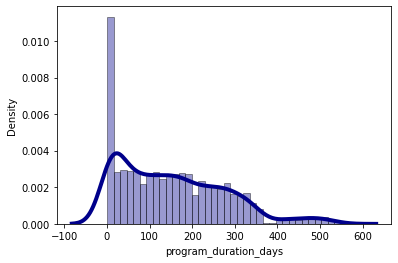

In [227]:
sns.distplot(sampel['program_duration_days'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


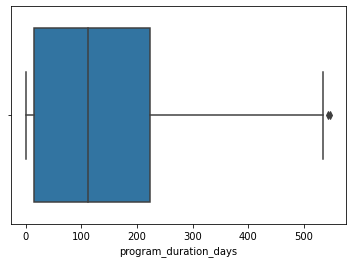

In [228]:
sns.boxplot(job_data['program_duration_days'])

In [229]:
job_data[(job_data['placed'] == 1) & (job_data['program_duration_days'] > 1)]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
4,5,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG,19,A
23,24,Placed,PSO,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5.0,4,Male,Non-Hispanic White or Euro-American,NOV,19,B
30,31,Placed,SWE,73.0,1,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0.0,1,Male,East Asian or Asian American,NOV,19,A
39,40,Placed,SWE,83.0,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,NaN,15,Male,Native American or Alaskan Native,NOV,19,A
54,55,Placed,SWE,76.0,1,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,0.0,30,Female,East Asian or Asian American,AUG,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,2528,Placed,SWE,31.0,1,Student,Bachelor's Degree,NaN,Figuring out which jobs to apply for,Less than one year,NaN,6.0,6,Male,South Asian or Indian American,JAN,19,B
2528,2529,Placed,Design,277.0,1,Student,Doctorate or Professional Degree,Less than one month,Technical interviewing,5+ years,Other,NaN,45,Male,Decline to Self Identify,FEB,20,A
2531,2532,Placed,SWE,310.0,1,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,NaN,F1 Visa/OPT,0.0,6,NaN,East Asian or Asian American,AUG,19,A
2533,2534,Placed,Design,33.0,1,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0.0,9,Male,Non-Hispanic White or Euro-American,MAR,18,A


In [230]:
sampel = job_data.copy()

In [231]:
sampel['program_duration_days'].skew()  #Moderately skewed

0.816886416261294

In [232]:
job_data['program_duration_days'] = np.sqrt(job_data['program_duration_days'])


In [233]:
job_data['program_duration_days'].skew()

-0.06933004519967961

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


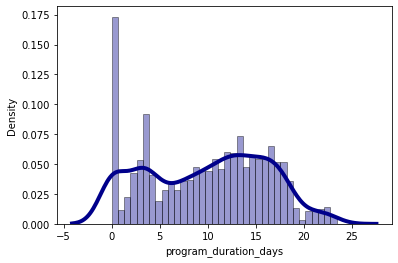

In [234]:
sns.distplot(job_data['program_duration_days'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [235]:
job_data[job_data['employment_status '].isnull() ]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
67,68,Placed,Data,10.049876,1,NaN,Bachelor's Degree,6 months to a year,Getting past final round interviews,1-2 years,F1 Visa/OPT,0.0,15,Female,South Asian or Indian American,FEB,19,A
73,74,Active,SWE,NaN,0,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,Citizen,2.0,20,Female,Two or More Races,MAR,19,B
81,82,Placed,Design,13.341664,1,NaN,Master's Degree,1-2 months,Hearing back on my applications,3-4 years,Citizen,3.0,80,Female,East Asian or Asian American,MAR,19,B
89,90,Placed,SWE,10.488088,1,NaN,Master's Degree,1-2 months,Getting past mid-stage interviews,Less than one year,NaN,2.0,40,Male,South Asian or Indian American,JAN,19,A
90,91,Placed,SWE,6.000000,1,NaN,Bachelor's Degree,Less than one month,Figuring out which jobs to apply for,3-4 years,NaN,2.0,20,Male,Non-Hispanic White or Euro-American,DEC,18,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2531,Active,Design,NaN,0,NaN,Bachelor's Degree,6 months to a year,Hearing back on my applications,1-2 years,F1 Visa/OPT,0.0,40,NaN,South Asian or Indian American,AUG,19,B
2532,2533,Active,SWE,NaN,0,NaN,Bachelor's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,2,NaN,"Black, Afro-Caribbean, or African American",OCT,18,B
2533,2534,Placed,Design,5.744563,1,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0.0,9,Male,Non-Hispanic White or Euro-American,MAR,18,A
2540,2541,Withdrawn (Failed),Data,22.090722,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN,19,B


In [236]:
F1_No_Degree  = job_data[(job_data['highest_level_of_education'] =='Some College, No Degree') & (job_data['work_authorization_status'] == "F1 Visa/OPT")]
print(F1_No_Degree.shape)

(35, 18)


In [237]:
job_data1 = job_data.copy()

In [238]:
No_degree_index = F1_No_Degree.index

In [239]:
job_data1  = job_data1.drop(index = No_degree_index )

In [240]:
job_data1.shape

(2507, 18)

In [241]:
job_data1[job_data1['length_of_job_search'].isnull()]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
72,73,Placed,SWE,12.369317,1,Contractor,Bachelor's Degree,NaN,Hearing back on my applications,5+ years,Citizen,1.0,30,Male,South Asian or Indian American,DEC,18,A
126,127,Withdrawn,Design,12.489996,0,Student,NaN,NaN,Hearing back on my applications,Less than one year,F1 Visa/OPT,1.0,70,NaN,South Asian or Indian American,FEB,19,A
133,134,Placed,SWE,16.492423,1,Unemployed,Bachelor's Degree,NaN,Figuring out which jobs to apply for,1-2 years,Green Card,3.0,80,Male,South Asian or Indian American,OCT,18,B
212,213,Placed,SWE,14.212670,1,Student,Bachelor's Degree,NaN,Technical interviewing,1-2 years,Citizen,NaN,40,Female,South Asian or Indian American,OCT,18,B
222,223,Placed,SWE,6.633250,1,NaN,"Some College, No Degree",NaN,Hearing back on my applications,3-4 years,Citizen,0.0,15,Male,Non-Hispanic White or Euro-American,JAN,19,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2443,Active,SWE,NaN,0,Unemployed,Master's Degree,NaN,Figuring out which jobs to apply for,1-2 years,Citizen,0.0,20,NaN,South Asian or Indian American,APR,19,B
2475,2476,Deferred,SWE,0.000000,0,Unemployed,Doctorate or Professional Degree,NaN,Figuring out which jobs to apply for,1-2 years,Other,6.0,70,Male,South Asian or Indian American,OCT,18,A
2478,2479,Placed,SWE,12.529964,1,Employed Part-Time,"Some College, No Degree",NaN,Hearing back on my applications,Less than one year,Citizen,1.0,50,Male,East Asian or Asian American,OCT,19,A
2527,2528,Placed,SWE,5.567764,1,Student,Bachelor's Degree,NaN,Figuring out which jobs to apply for,Less than one year,NaN,6.0,6,Male,South Asian or Indian American,JAN,19,B


In [242]:
job_data1['length_of_job_search'].fillna("Other", inplace = True)

In [243]:
job_data1['length_of_job_search'].value_counts()

Less than one month    806
1-2 months             770
3-5 months             512
6 months to a year     231
Over a year            116
Other                   72
Name: length_of_job_search, dtype: int64

In [244]:
Anomaly_job_search = pd.crosstab(index = job_data1['length_of_job_search'] , columns= job_data1['employment_status '])
print(Anomaly_job_search)

employment_status     Contractor  Employed Full-Time  ...  Student  Unemployed
length_of_job_search                                  ...                     
1-2 months                    47                 128  ...      237         196
3-5 months                    28                  91  ...      164         127
6 months to a year            22                  39  ...       56          64
Less than one month           57                 140  ...      254         213
Other                          6                   8  ...       19          25
Over a year                    7                  21  ...       34          30

[6 rows x 5 columns]


In [245]:
job_data1['length_of_job_search'] = job_data1['length_of_job_search'].str.replace('Less than one month', '0.5')
job_data1['length_of_job_search'] = job_data1['length_of_job_search'].str.replace('1-2 months', '1.5')
job_data1['length_of_job_search'] = job_data1['length_of_job_search'].str.replace('3-5 months', '4')
job_data1['length_of_job_search'] = job_data1['length_of_job_search'].str.replace('6 months to a year', '9')
job_data1['length_of_job_search'] = job_data1['length_of_job_search'].str.replace('Over a year', '12')


In [246]:
job_data1['length_of_job_search'] = job_data1['length_of_job_search'].str.replace('Other', '0')

In [247]:
job_data1['length_of_job_search'].value_counts()

0.5    806
1.5    770
4      512
9      231
12     116
0       72
Name: length_of_job_search, dtype: int64

In [248]:
No_prof_exp = job_data1[job_data1['professional_experience'].isnull()]

In [249]:
job_data1['professional_experience'] = job_data1['professional_experience'].str.replace('1-2 years', '1.5')
job_data1['professional_experience'] = job_data1['professional_experience'].str.replace('Less than one year', '0.5')
job_data1['professional_experience'] = job_data1['professional_experience'].str.replace('3-4 years', '3.5')
job_data1['professional_experience'].replace('5+ years','6', inplace = True)


In [250]:
print(job_data1['professional_experience'].value_counts())

1.5    873
0.5    606
3.5    545
6      263
Name: professional_experience, dtype: int64


In [251]:
job_data1['professional_experience'].fillna('Other', inplace = True)

In [252]:
pd.crosstab(index= job_data1['professional_experience'], columns= job_data1['highest_level_of_education'])

highest_level_of_education,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
professional_experience,,,,,,,
0.5,323,27,8,3,199,23,5
1.5,479,48,2,7,282,38,1
3.5,287,36,3,3,173,26,5
6,149,7,1,2,87,8,3
Other,122,16,1,0,69,5,1


In [253]:
pd.crosstab(index= job_data1['professional_experience'], columns= job_data1['work_authorization_status'])

work_authorization_status,Canada Citizen,Citizen,F1 Visa/CPT,F1 Visa/OPT,Green Card,H1B,Not Authorized,Other,STEM OPT
professional_experience,,,,,,,,,
0.5,4,280,25,159,43,9,1,25,0
1.5,7,366,58,232,69,14,2,32,3
3.5,9,242,24,107,36,14,1,34,3
6,2,115,9,58,23,7,0,15,2
Other,2,100,15,53,13,4,0,6,0


In [254]:
job_data1[job_data1['work_authorization_status'].isnull()]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
38,39,Active,PSO,NaN,0,Contractor,Bachelor's Degree,1.5,Getting past final round interviews,6,NaN,4.0,25,Male,East Asian or Asian American,NOV,19,B
75,76,Withdrawn (Failed),SWE,5.196152,0,Contractor,Bachelor's Degree,12,Hearing back on my applications,3.5,NaN,2.0,3,Female,South Asian or Indian American,JAN,19,A
80,81,MIA,Design,NaN,0,Student,Master's Degree,9,Hearing back on my applications,1.5,NaN,0.0,3,Female,South Asian or Indian American,MAR,19,A
84,85,Placed,SWE,13.856406,1,Student,Master's Degree,0.5,Lack of relevant experience,1.5,NaN,3.0,80,Female,South Asian or Indian American,DEC,18,A
89,90,Placed,SWE,10.488088,1,NaN,Master's Degree,1.5,Getting past mid-stage interviews,0.5,NaN,2.0,40,Male,South Asian or Indian American,JAN,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2521,Placed,SWE,18.330303,1,Student,Bachelor's Degree,1.5,Getting past final round interviews,3.5,NaN,0.0,9,NaN,East Asian or Asian American,NOV,18,A
2527,2528,Placed,SWE,5.567764,1,Student,Bachelor's Degree,0,Figuring out which jobs to apply for,0.5,NaN,6.0,6,Male,South Asian or Indian American,JAN,19,B
2529,2530,Closed Lost,SWE,0.000000,0,Employed Part-Time,Master's Degree,0.5,Technical interviewing,0.5,NaN,5.0,45,Female,Non-Hispanic White or Euro-American,AUG,18,A
2536,2537,Active,Design,NaN,0,Employed Full-Time,Bachelor's Degree,12,Hearing back on my applications,6,NaN,0.0,10,NaN,South Asian or Indian American,FEB,20,B


In [255]:
job_data1['work_authorization_status'].value_counts()

Citizen           1103
F1 Visa/OPT        609
Green Card         184
F1 Visa/CPT        131
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [256]:
def impute_nan_add_variable(job_data1,ColName):
  job_data1[ColName+"_Imputed"] = np.where(job_data1[ColName].isnull(),1,0)
  mode_category = job_data1[ColName].mode()[0]
  job_data1[ColName].fillna(mode_category, inplace = True)

for columns in ['work_authorization_status', 'gender']:
    impute_nan_add_variable(job_data1,columns)

In [257]:
job_data1.head()

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type,work_authorization_status_Imputed,gender_Imputed
0,1,Active,SWE,NaN,0,Unemployed,Bachelor's Degree,4,Hearing back on my applications,3.5,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American,OCT,19,A,0,0
1,2,Active,PSO,NaN,0,Unemployed,"Some College, No Degree",4,Getting past final round interviews,1.5,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American,JAN,20,A,0,0
2,3,Closed Lost,Design,0.000000,0,Employed Part-Time,Master's Degree,0.5,Figuring out which jobs to apply for,0.5,Citizen,0.0,0,Male,East Asian or Asian American,AUG,19,B,0,0
3,4,Closed Lost,PSO,0.000000,0,Contractor,Bachelor's Degree,0.5,Getting past final round interviews,0.5,Citizen,5.0,25,Male,Decline to Self Identify,AUG,19,B,0,0
4,5,Placed,SWE,9.433981,1,Unemployed,Bachelor's Degree,1.5,Hearing back on my applications,1.5,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG,19,A,0,0


In [258]:
null_race = job_data1[job_data1['race'].isnull()].index


In [259]:
job_data1 = job_data1.drop(index=null_race)

In [260]:
job_data1[job_data1['race'].isnull()]

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type,work_authorization_status_Imputed,gender_Imputed


In [261]:
job_data1['number_of_applications'].describe()

count    2490.000000
mean       36.346988
std        53.706426
min         0.000000
25%         9.000000
50%        20.000000
75%        45.000000
max      1000.000000
Name: number_of_applications, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


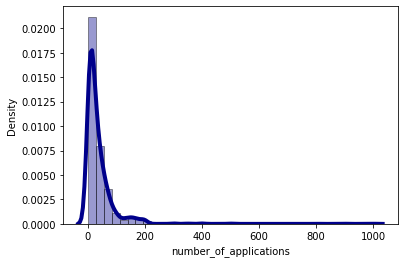

In [262]:
sns.distplot(job_data1['number_of_applications'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


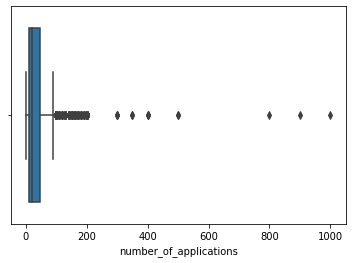

In [263]:
sns.boxplot(job_data['number_of_applications'])

In [264]:
category = ['Low', 'Medium', 'High']
quantiles = job_data.iloc[:, 12:13].quantile([0, 0.25, 0.75, 1.0])
for col in job_data.iloc[:, 12:13]:
  bin_edge = quantiles[col]

  job_data[col] = pd.cut(job_data[col], bins= bin_edge , labels= category , include_lowest= True)

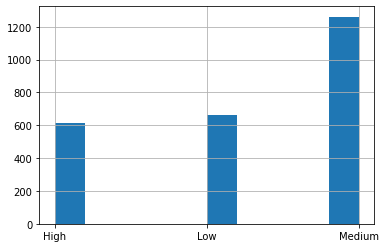

In [265]:
job_data['number_of_applications'].hist()

In [266]:
pd.crosstab(index = job_data['number_of_applications'], columns = job_data['placed'])

placed,0,1
number_of_applications,,
Low,401,264
Medium,790,471
High,396,220


In [267]:
job_data.shape

(2542, 18)

In [268]:
job_data['gender'].value_counts()

Male                        1491
Female                       537
Decline to Self Identify      16
Non-Binary                     6
Name: gender, dtype: int64

In [269]:
Other_gender = job_data[job_data['gender'] == 'Decline to Self Identify'].index

In [270]:
dupe = job_data.copy()

In [271]:
dupe.reset_index(drop= True)

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
0,1,Active,SWE,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,High,Male,Non-Hispanic White or Euro-American,OCT,19,A
1,2,Active,PSO,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,Low,Male,Non-Hispanic White or Euro-American,JAN,20,A
2,3,Closed Lost,Design,0.000000,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,Low,Male,East Asian or Asian American,AUG,19,B
3,4,Closed Lost,PSO,0.000000,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,Medium,Male,Decline to Self Identify,AUG,19,B
4,5,Placed,SWE,9.433981,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,High,Male,East Asian or Asian American,AUG,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,2540,Withdrawn (Failed),Design,21.377558,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,Medium,Male,Non-Hispanic White or Euro-American,JUN,18,A
2538,2541,Withdrawn (Failed),Data,22.090722,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,Low,Male,Non-Hispanic White or Euro-American,JAN,19,B
2539,2542,Active,SWE,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,Medium,Female,Non-Hispanic White or Euro-American,SEP,18,C
2540,2543,Active,SWE,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,Medium,Male,Decline to Self Identify,MAY,18,A


In [272]:
dupe.drop(index=Other_gender)

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
0,1,Active,SWE,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,High,Male,Non-Hispanic White or Euro-American,OCT,19,A
1,2,Active,PSO,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,Low,Male,Non-Hispanic White or Euro-American,JAN,20,A
2,3,Closed Lost,Design,0.000000,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,Low,Male,East Asian or Asian American,AUG,19,B
3,4,Closed Lost,PSO,0.000000,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,Medium,Male,Decline to Self Identify,AUG,19,B
4,5,Placed,SWE,9.433981,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,High,Male,East Asian or Asian American,AUG,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,21.377558,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,Medium,Male,Non-Hispanic White or Euro-American,JUN,18,A
2540,2541,Withdrawn (Failed),Data,22.090722,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,Low,Male,Non-Hispanic White or Euro-American,JAN,19,B
2541,2542,Active,SWE,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,Medium,Female,Non-Hispanic White or Euro-American,SEP,18,C
2542,2543,Active,SWE,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,Medium,Male,Decline to Self Identify,MAY,18,A


In [273]:
JOb_data1 = job_data[~ ( job_data['gender'] == 'Decline to Self Identify')]

In [274]:
job_data2 = JOb_data1[~ ( JOb_data1['gender'] == 'Non-Binary')]

In [275]:
job_data3 = job_data2[~ (job_data2['gender'].isnull())]

In [276]:
job_data3.shape

(2028, 18)

In [277]:
(job_data2.gender.value_counts().values[0] / (job_data2.gender.value_counts().values[0] +job_data2.gender.value_counts().values[1]))*100

73.5207100591716

In [278]:
(job_data2.gender.value_counts().values[1] / (job_data2.gender.value_counts().values[0] +job_data2.gender.value_counts().values[1]))*100

26.479289940828405

In [279]:
Missing_na = job_data2[job_data2['gender'].isnull()]

In [280]:
Missing_na.shape

(492, 18)

In [281]:
Impute_male = Missing_na.sample(n= 369, replace= False)
Impute_male

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
1678,1679,Placed,SWE,9.643651,1,NaN,Some High School,6 months to a year,Hearing back on my applications,5+ years,F1 Visa/CPT,6.0,Low,NaN,East Asian or Asian American,APR,18,B
276,277,Withdrawn (Failed),Data,21.400935,0,NaN,Doctorate or Professional Degree,1-2 months,Getting past phone screens,3-4 years,Other,NaN,Medium,NaN,East Asian or Asian American,SEP,18,A
1938,1939,Withdrawn,SWE,18.547237,0,Employed Full-Time,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,Low,NaN,South Asian or Indian American,FEB,18,A
702,703,Withdrawn (Failed),SWE,22.516660,0,NaN,Bachelor's Degree,Less than one month,Hearing back on my applications,Less than one year,Citizen,NaN,High,NaN,Non-Hispanic White or Euro-American,OCT,18,B
2433,2434,Placed,SWE,7.280110,1,Unemployed,Bachelor's Degree,6 months to a year,Getting past final round interviews,NaN,Other,1.0,Low,NaN,Two or More Races,NOV,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,Withdrawn (Trial),SWE,3.605551,0,Unemployed,Master's Degree,Less than one month,Hearing back on my applications,1-2 years,Citizen,5.0,High,NaN,South Asian or Indian American,SEP,19,A
1831,1832,Placed,SWE,9.797959,1,Student,Master's Degree,Less than one month,Getting past mid-stage interviews,Less than one year,Citizen,4.0,Low,NaN,Middle Eastern or Arab American,FEB,18,A
1601,1602,Placed,SWE,13.114877,1,Unemployed,Bachelor's Degree,Less than one month,Technical interviewing,NaN,F1 Visa/OPT,3.0,Medium,NaN,East Asian or Asian American,NOV,19,B
2503,2504,Withdrawn,SWE,11.357817,0,Unemployed,NaN,3-5 months,Technical interviewing,5+ years,F1 Visa/OPT,1.0,Low,NaN,South Asian or Indian American,OCT,18,B


In [282]:
Impute_male.gender =  Impute_male.gender.fillna('Male')

In [283]:
Impute_male.gender.value_counts()

Male    369
Name: gender, dtype: int64

In [284]:
Impute_male

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
1678,1679,Placed,SWE,9.643651,1,NaN,Some High School,6 months to a year,Hearing back on my applications,5+ years,F1 Visa/CPT,6.0,Low,Male,East Asian or Asian American,APR,18,B
276,277,Withdrawn (Failed),Data,21.400935,0,NaN,Doctorate or Professional Degree,1-2 months,Getting past phone screens,3-4 years,Other,NaN,Medium,Male,East Asian or Asian American,SEP,18,A
1938,1939,Withdrawn,SWE,18.547237,0,Employed Full-Time,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,Low,Male,South Asian or Indian American,FEB,18,A
702,703,Withdrawn (Failed),SWE,22.516660,0,NaN,Bachelor's Degree,Less than one month,Hearing back on my applications,Less than one year,Citizen,NaN,High,Male,Non-Hispanic White or Euro-American,OCT,18,B
2433,2434,Placed,SWE,7.280110,1,Unemployed,Bachelor's Degree,6 months to a year,Getting past final round interviews,NaN,Other,1.0,Low,Male,Two or More Races,NOV,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,Withdrawn (Trial),SWE,3.605551,0,Unemployed,Master's Degree,Less than one month,Hearing back on my applications,1-2 years,Citizen,5.0,High,Male,South Asian or Indian American,SEP,19,A
1831,1832,Placed,SWE,9.797959,1,Student,Master's Degree,Less than one month,Getting past mid-stage interviews,Less than one year,Citizen,4.0,Low,Male,Middle Eastern or Arab American,FEB,18,A
1601,1602,Placed,SWE,13.114877,1,Unemployed,Bachelor's Degree,Less than one month,Technical interviewing,NaN,F1 Visa/OPT,3.0,Medium,Male,East Asian or Asian American,NOV,19,B
2503,2504,Withdrawn,SWE,11.357817,0,Unemployed,NaN,3-5 months,Technical interviewing,5+ years,F1 Visa/OPT,1.0,Low,Male,South Asian or Indian American,OCT,18,B


In [285]:
cat = Impute_male.index

In [286]:
Missing_na = Missing_na.drop( index= cat)

In [287]:
Missing_na

,id,status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
119,120,Withdrawn,SWE,8.485281,0,Contractor,Master's Degree,3-5 months,Getting past final round interviews,1-2 years,F1 Visa/OPT,1.0,Medium,NaN,East Asian or Asian American,APR,19,B
126,127,Withdrawn,Design,12.489996,0,Student,NaN,NaN,Hearing back on my applications,Less than one year,F1 Visa/OPT,1.0,High,NaN,South Asian or Indian American,FEB,19,A
137,138,Withdrawn,Other,5.656854,0,Employed Part-Time,Bachelor's Degree,Less than one month,Hearing back on my applications,NaN,NaN,2.0,Medium,NaN,East Asian or Asian American,MAR,19,B
144,145,Withdrawn,Data,12.489996,0,Unemployed,Bachelor's Degree,1-2 months,Getting past final round interviews,3-4 years,F1 Visa/OPT,0.0,Medium,NaN,East Asian or Asian American,FEB,19,A
163,164,Placed,SWE,11.313708,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,Less than one year,Citizen,0.0,Medium,NaN,South Asian or Indian American,JUL,19,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2500,Closed Lost,SWE,0.000000,0,Student,Doctorate or Professional Degree,Less than one month,Getting past phone screens,NaN,NaN,2.0,Medium,NaN,Non-Hispanic White or Euro-American,JAN,20,A
2511,2512,Withdrawn,SWE,17.860571,0,Employed Full-Time,Bachelor's Degree,Less than one month,Figuring out which jobs to apply for,NaN,Citizen,6.0,Low,NaN,Non-Hispanic White or Euro-American,AUG,19,B
2531,2532,Placed,SWE,17.606817,1,Unemployed,Doctorate or Professional Degree,Less than one month,Technical skills,NaN,F1 Visa/OPT,0.0,Low,NaN,East Asian or Asian American,AUG,19,A
2532,2533,Active,SWE,NaN,0,NaN,Bachelor's Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,Low,NaN,"Black, Afro-Caribbean, or African American",OCT,18,B


In [288]:
Missing_na.gender = Missing_na.gender.fillna('Female')

In [289]:
Missing_na.gender.value_counts()

Female    123
Name: gender, dtype: int64

In [290]:
job_data4 = pd.concat([job_data3, Missing_na, Impute_male], axis= 0)

In [291]:
job_data4.shape

(2520, 18)

In [292]:
job_data5 = job_data4[ ~ (job_data4['race'].isnull())]
job_data5.shape

(2503, 18)

In [293]:
job_data5 = job_data5.drop('program_duration_days', axis  =1)

In [294]:
job_data5['work_authorization_status'] = job_data5['work_authorization_status'].fillna('Other')

In [295]:
job_data6 = job_data5.copy()


In [296]:
job_data5['employment_status '].value_counts()

Student               767
Unemployed            650
Employed Full-Time    426
Employed Part-Time    263
Contractor            170
Name: employment_status , dtype: int64

In [297]:
job_data5['work_authorization_status'].value_counts()

Citizen           1081
F1 Visa/OPT        636
Other              392
Green Card         183
F1 Visa/CPT        129
H1B                 47
Canada Citizen      23
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [298]:
job_data5[(job_data5['employment_status '].isnull()) & (job_data5['work_authorization_status']== 'F1 Visa/OPT')	].index

Int64Index([  67,   93,  131,  171,  182,  223,  229,  260,  289,  316,  326,
             338,  343,  655,  736,  756,  781,  790,  881,  910,  965,  994,
            1164, 1317, 1344, 1388, 1439, 1468, 1488, 1493, 1547, 1555, 1618,
            1677, 1840, 2021, 2046, 2050, 2221, 2229, 2252, 2351, 2377, 2390,
            2463, 2533, 2540,  388, 1325, 1345, 2323,  858, 2446, 1294, 1829,
             153, 1022, 1882, 1646, 2530, 1386],
           dtype='int64')

In [299]:
indices = [67,   93,  131,  171,  182,  223,  229,  260,  289,  316,  326,
             338,  343,  655,  736,  756,  781,  790,  881,  910,  965,  994,
            1164, 1317, 1344, 1388, 1439, 1468, 1488, 1493, 1547, 1555, 1618,
            1677, 1840, 2021, 2046, 2050, 2221, 2229, 2252, 2351, 2377, 2390,
            2463, 2533, 2540,  153,  388, 1829, 1294,  858, 1345, 1882, 1646,
            2530, 1386, 2323, 1022, 2446, 1325]
job_data5.loc[indices, 'employment_status '] = "Student"

In [300]:
job_data5[(job_data5['employment_status '].isnull()) & (job_data5['work_authorization_status']== 'F1 Visa/CPT')	].index

Int64Index([295, 630, 742, 1605, 1834, 2119, 1678, 1423], dtype='int64')

In [301]:
indices2 = [295, 630, 742, 1605, 1834, 2119, 1423, 1678]
job_data5.loc[indices2, 'employment_status '] = "Student"

In [302]:
job_data5['employment_status '] = job_data5['employment_status '].str.replace('Employed Full-Time', 'Employed')


In [303]:
job_data5['employment_status '] = job_data5['employment_status '].str.replace('Employed Part-Time', 'Employed')
job_data5['employment_status '] = job_data5['employment_status '].str.replace('Contractor', 'Employed')

In [304]:
job_data5['work_authorization_status'] = job_data5['work_authorization_status'].str.replace('F1 Visa/OPT', 'F1 Visa')
job_data5['work_authorization_status'] = job_data5['work_authorization_status'].str.replace('F1 Visa/CPT', 'F1 Visa')

In [305]:
job_data5['work_authorization_status'] = job_data5['work_authorization_status'].str.replace('STEM OPT', 'Other')
job_data5['work_authorization_status'] = job_data5['work_authorization_status'].str.replace('Not Authorized', 'Other')

In [306]:
job_data5['professional_experience'] = job_data5['professional_experience'].str.replace('1-2 years', '1.5')
job_data5['professional_experience'] = job_data5['professional_experience'].str.replace('Less than one year', '0.5')
job_data5['professional_experience'] = job_data5['professional_experience'].str.replace('3-4 years', '3.5')
job_data5['professional_experience'].replace('5+ years','6', inplace = True)


In [307]:
##fill median value 

job_data5['professional_experience']= job_data5['professional_experience'].fillna('1.5')

In [308]:
job_data5['professional_experience'].value_counts()

1.5    1086
0.5     609
3.5     546
6       262
Name: professional_experience, dtype: int64

In [309]:
job_data5['number_of_interviews'].median()

1.0

In [310]:
job_data5['number_of_interviews'].fillna((job_data5['number_of_interviews'].median()), inplace = True)

In [311]:
features_with_na = [features for features in job_data5.columns if job_data5[features].isnull().sum() >1 ]
for feature in features_with_na:
  print(feature, np.round(job_data5[feature].isnull().mean()*100,4),'% missing values')

employment_status  6.3124 % missing values
highest_level_of_education 2.2773 % missing values
length_of_job_search 2.8765 % missing values
biggest_challenge_in_search 0.9588 % missing values
type 0.3196 % missing values


In [312]:
job_data5.shape


(2503, 17)

In [313]:
job_data5.dropna(inplace= True)

In [314]:
job_data5.shape

(2201, 17)

In [317]:
pd.crosstab(index= job_data5['status'], columns= job_data5['placed'])

placed,0,1
status,,
Active,470,0
Break,30,0
Closed Lost,161,0
Deferred,26,0
MIA,45,0
Placed,0,812
Withdrawn,348,0
Withdrawn (Failed),67,0
Withdrawn (Trial),242,0


In [320]:
job_data5 = job_data5[~ (job_data5['status'] == 'Active')]

In [321]:
job_data5.shape

(1731, 17)

In [322]:
job_data7 = job_data5.copy()

In [323]:
job_data7.head(2)

,id,status,primary_track,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,month,year,type
2,3,Closed Lost,Design,0,Employed,Master's Degree,Less than one month,Figuring out which jobs to apply for,0.5,Citizen,0.0,Low,Male,East Asian or Asian American,AUG,19,B
3,4,Closed Lost,PSO,0,Employed,Bachelor's Degree,Less than one month,Getting past final round interviews,0.5,Citizen,5.0,Medium,Male,Decline to Self Identify,AUG,19,B


In [324]:
job_data7 = job_data7.drop(['status', 'month', 'year',  'type'], axis =1)

In [325]:
job_data7.head(2)

,id,primary_track,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,3,Design,0,Employed,Master's Degree,Less than one month,Figuring out which jobs to apply for,0.5,Citizen,0.0,Low,Male,East Asian or Asian American
3,4,PSO,0,Employed,Bachelor's Degree,Less than one month,Getting past final round interviews,0.5,Citizen,5.0,Medium,Male,Decline to Self Identify
